In [64]:
import pandas as pd 
import numpy as np
import nltk
import string
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
#nltk.download_shell()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [65]:
def load_data():
    train_df = pd.read_csv('train.csv',encoding = 'utf8')
    test_df = pd.read_csv('test.csv',encoding = 'utf8')
    return train_df, test_df

In [66]:
train_df, test_df = load_data()

In [67]:
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [68]:
string.punctuation.replace('#','').replace('@','')

'!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

In [69]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Text Cleaning

In [70]:
def remove_acc(df):
    tweet = df.copy()
    pattern = r'(@\w+)'
    tweet['tweet'] = tweet['tweet'].apply(lambda message: re.sub(pattern,'',message).strip())
    return tweet

In [71]:
remove_acc(train_df)

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"#sikh #temple vandalised in in #calgary, #wso condemns act"


In [72]:
def remove_punc(df):
    tweet = df.copy()
    tweet['tweet'] = tweet['tweet'].apply(lambda message: ''.join([m for m in message 
                                                                   if m not in string.punctuation.replace('#','').replace('@','')]))
    return tweet

In [73]:
remove_punc(train_df)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i cant use cause they dont offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð± ðððð ð¦ð¦ð¦
4,5,0,factsguide society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuuðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,@user #sikh #temple vandalised in in #calgary #wso condemns act


In [74]:
def remove_stopwords(df):
    tweet = df.copy()
    tweet['tweet'] = tweet['tweet'].apply(lambda message: ' '.join([word for word in message.split() 
                                                           if word.lower() not in stopwords.words('english')]))
    return tweet

In [75]:
remove_stopwords(train_df)

,id,label,tweet
0,1,0,@user father dysfunctional selfish drags kids dysfunction. #run
1,2,0,@user @user thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked
2,3,0,bihday majesty
3,4,0,#model love u take u time urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society #motivation
...,...,...,...
31957,31958,0,ate @user isz youuu?ðððððððððâ¤ï¸
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised #calgary, #wso condemns act"


In [76]:
def remove_shorts(df):
    tweet = df.copy()
    tweet['tweet'] = tweet['tweet'].apply(lambda message: ' '.join([word for word in message.split() if len(word)>3]))
    return tweet

In [77]:
remove_shorts(train_df)

,id,label,tweet
0,1,0,@user when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0,@user @user thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society #motivation
...,...,...,...
31957,31958,0,@user that youuu?ðððððððððâ¤ï¸
31958,31959,0,nina turner airwaves trying wrap herself mantle genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised #calgary, #wso condemns"


In [78]:
def remove_alien(df):
    tweet = df.copy()
    tweet['tweet'] = tweet['tweet'].apply(lambda message: ''.join(re.findall(r'[a-zA-z# ]', message)))
    return tweet

In [79]:
remove_alien(train_df)

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,user user thanks for #lyft credit i cant use cause they dont offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ur
4,5,0,factsguide society now #motivation
...,...,...,...
31957,31958,0,ate user isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,user #sikh #temple vandalised in in #calgary #wso condemns act


In [80]:
clean_train_df = remove_stopwords(
                                   remove_alien(
                                   remove_punc(
                                   remove_acc(train_df))))

In [81]:
clean_train_df

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfunction #run
1,2,0,thanks #lyft credit cant use cause dont offer wheelchair vans pdx #disapointed #getthanked
2,3,0,bihday majesty
3,4,0,#model love u take u time ur
4,5,0,factsguide society #motivation
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm #shame #imwithher
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,#sikh #temple vandalised #calgary #wso condemns act


# Stemming

In [82]:
from nltk.stem.porter import *

In [83]:
stemmer = PorterStemmer()

In [84]:
def stemming_tweet(df):
    tweet = df.copy()
    tweet['tweet'] = tweet['tweet'].apply(lambda message: ' '.join([stemmer.stem(word) for word in message.split()]))
    return tweet

In [85]:
clean_stem_train_df = stemming_tweet(clean_train_df)

In [86]:
clean_stem_train_df

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct #run
1,2,0,thank #lyft credit cant use caus dont offer wheelchair van pdx #disapoint #getthank
2,3,0,bihday majesti
3,4,0,#model love u take u time ur
4,5,0,factsguid societi #motiv
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwav tri wrap mantl genuin hero like shirley chisolm #shame #imwithh
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,#sikh #templ vandalis #calgari #wso condemn act


# Word Cloud Data VIZ

In [87]:
all_words = ' '.join([text for text in clean_stem_train_df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

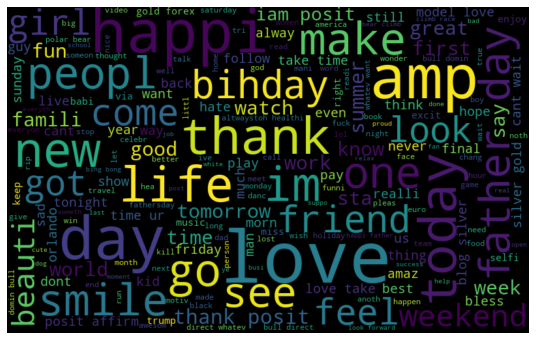

In [110]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [103]:
neg_tweet = clean_stem_train_df[clean_stem_train_df['label']==1]['tweet']
pos_tweet = clean_stem_train_df[clean_stem_train_df['label']==0]['tweet']

In [107]:
def word_cloud_viz(tweet):
    all_word = ' '.join(text for text in tweet)
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    return plt.show()

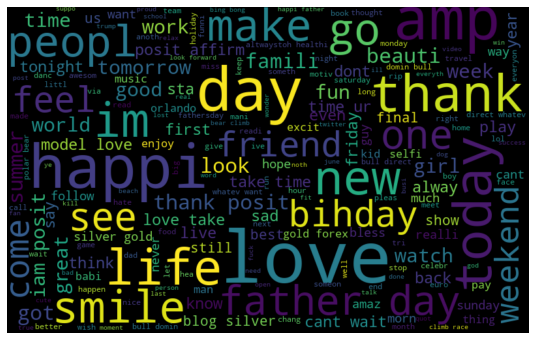

In [108]:
word_cloud_viz(pos_tweet)

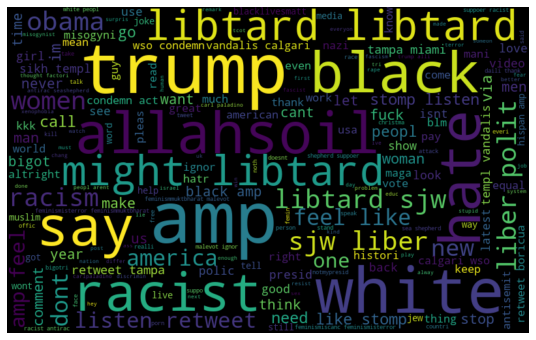

In [109]:
word_cloud_viz(neg_tweet)

In [112]:
clean_stem_train_df

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct #run
1,2,0,thank #lyft credit cant use caus dont offer wheelchair van pdx #disapoint #getthank
2,3,0,bihday majesti
3,4,0,#model love u take u time ur
4,5,0,factsguid societi #motiv
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwav tri wrap mantl genuin hero like shirley chisolm #shame #imwithh
31959,31960,0,listen sad song monday morn otw work sad
31960,31961,1,#sikh #templ vandalis #calgari #wso condemn act


# Count Vectorizer

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
bow_transformer = CountVectorizer().fit(clean_stem_train_df['tweet'])

In [115]:
bow_transformer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [116]:
bow_transformer.vocabulary_

{'father': 9620,
 'dysfunct': 8341,
 'selfish': 25709,
 'drag': 8065,
 'kid': 15706,
 'run': 24988,
 'thank': 28937,
 'lyft': 17507,
 'credit': 6385,
 'cant': 4513,
 'use': 30849,
 'caus': 4765,
 'dont': 7925,
 'offer': 20973,
 'wheelchair': 32036,
 'van': 30947,
 'pdx': 21979,
 'disapoint': 7596,
 'getthank': 11291,
 'bihday': 2993,
 'majesti': 17681,
 'model': 18874,
 'love': 17175,
 'take': 28465,
 'time': 29520,
 'ur': 30809,
 'factsguid': 9416,
 'societi': 26864,
 'motiv': 19155,
 'huge': 13537,
 'fan': 9513,
 'fare': 9544,
 'big': 2939,
 'talk': 28495,
 'leav': 16363,
 'chao': 4959,
 'pay': 21926,
 'disput': 7680,
 'get': 11264,
 'allshowandnogo': 744,
 'camp': 4434,
 'tomorrow': 29736,
 'danni': 6850,
 'next': 20181,
 'school': 25457,
 'year': 32924,
 'exam': 9206,
 'think': 29315,
 'hate': 12634,
 'imagin': 13991,
 'actorslif': 202,
 'revolutionschool': 24499,
 'girl': 11400,
 'land': 16145,
 'allin': 715,
 'cav': 4770,
 'champion': 4927,
 'cleveland': 5466,
 'clevelandcavali':

In [117]:
len(bow_transformer.vocabulary_)

33360

In [118]:
bow_transformer.get_feature_names()

['aa',
 'aaa',
 'aaaaa',
 'aaaaaand',
 'aaaaah',
 'aaaaand',
 'aaahh',
 'aaahhhh',
 'aaahhhhh',
 'aaand',
 'aaawwwww',
 'aaberg',
 'aadityaji',
 'aah',
 'aakhri',
 'aal',
 'aalivyahsimon',
 'aaliyah',
 'aamaadmipay',
 'aameer',
 'aamirkhan',
 'aamp',
 'aamph',
 'aampm',
 'aand',
 'aap',
 'aapi',
 'aaptard',
 'aarakshan',
 'aarhu',
 'aaron',
 'aaronorenta',
 'aaronrhod',
 'aarya',
 'aaryn',
 'aascf',
 'aayat',
 'ab',
 'aba',
 'abandon',
 'abantu',
 'abasel',
 'abba',
 'abbey',
 'abbi',
 'abbibucket',
 'abbotabad',
 'abbott',
 'abbu',
 'abbyybel',
 'abc',
 'abcchicago',
 'abcdiscov',
 'abd',
 'abdomin',
 'abduct',
 'abe',
 'abella',
 'abenom',
 'aberdeen',
 'aberr',
 'aberystwyth',
 'abet',
 'abg',
 'abglp',
 'abhi',
 'abhishek',
 'abi',
 'abid',
 'abil',
 'abitur',
 'abject',
 'abk',
 'abl',
 'ableg',
 'ableism',
 'ablond',
 'abndp',
 'abo',
 'aboion',
 'abomin',
 'abou',
 'about',
 'aboutand',
 'aboutb',
 'abouthappy',
 'aboutjust',
 'aboutlastnight',
 'aboutmynextmov',
 'abouttim',
 '

In [120]:
bow = bow_transformer.transform(clean_stem_train_df['tweet'])

In [122]:
bow.shape

(31962, 33360)

In [123]:
bow.nnz

237839

In [124]:
def count_vector(df):
    tweet = df.copy()
    bow_transformer = CountVectorizer().fit(tweet['tweet'])
    bow = bow_transformer.transform(tweet['tweet'])
    return bow

In [126]:
bow = count_vector(clean_stem_train_df)

In [134]:
bow

<31962x33360 sparse matrix of type '<class 'numpy.int64'>'
	with 237839 stored elements in Compressed Sparse Row format>

In [135]:
print(bow)

  (0, 8065)	1
  (0, 8341)	2
  (0, 9620)	1
  (0, 15706)	1
  (0, 24988)	1
  (0, 25709)	1
  (1, 4513)	1
  (1, 4765)	1
  (1, 6385)	1
  (1, 7596)	1
  (1, 7925)	1
  (1, 11291)	1
  (1, 17507)	1
  (1, 20973)	1
  (1, 21979)	1
  (1, 28937)	1
  (1, 30849)	1
  (1, 30947)	1
  (1, 32036)	1
  (2, 2993)	1
  (2, 17681)	1
  (3, 17175)	1
  (3, 18874)	1
  (3, 28465)	1
  (3, 29520)	1
  :	:
  (31958, 16694)	1
  (31958, 17883)	1
  (31958, 20328)	1
  (31958, 25636)	1
  (31958, 25958)	1
  (31958, 26114)	1
  (31958, 30052)	1
  (31958, 30288)	1
  (31958, 32680)	1
  (31959, 16807)	1
  (31959, 18959)	1
  (31959, 19095)	1
  (31959, 21432)	1
  (31959, 25090)	2
  (31959, 26992)	1
  (31959, 32560)	1
  (31960, 185)	1
  (31960, 4372)	1
  (31960, 5904)	1
  (31960, 26317)	1
  (31960, 28821)	1
  (31960, 30953)	1
  (31960, 32730)	1
  (31961, 10320)	1
  (31961, 28937)	1


# TF-IDF

In [128]:
from sklearn.feature_extraction.text import TfidfTransformer

In [129]:
tfidf_transformer = TfidfTransformer().fit(bow)

In [132]:
bow_transformer.vocabulary_['father']

9620

In [136]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['father']]

4.767036341860914

In [137]:
message_tfidf = tfidf_transformer.transform(bow)

In [139]:
print(message_tfidf)

  (0, 25709)	0.3443425817994065
  (0, 24988)	0.2392047670581534
  (0, 15706)	0.2257726656961798
  (0, 9620)	0.1846983933892194
  (0, 8341)	0.7961088637350804
  (0, 8065)	0.3245506890497923
  (1, 32036)	0.33914203095963286
  (1, 30947)	0.3156016340772533
  (1, 30849)	0.18989944571697343
  (1, 28937)	0.1480494906034229
  (1, 21979)	0.33914203095963286
  (1, 20973)	0.2547505908842088
  (1, 17507)	0.32537178153134755
  (1, 11291)	0.3489121784137271
  (1, 7925)	0.16349584344079846
  (1, 7596)	0.36268242784201243
  (1, 6385)	0.2880611352206827
  (1, 4765)	0.23085825703019316
  (1, 4513)	0.15916019703361967
  (2, 17681)	0.8815071938803007
  (2, 2993)	0.47217059113976784
  (3, 30809)	0.5043915538397774
  (3, 29520)	0.40852278804509506
  (3, 28465)	0.4575232546171959
  (3, 18874)	0.5153713052531157
  :	:
  (31958, 25636)	0.14205749621656374
  (31958, 20328)	0.30650551276786364
  (31958, 17883)	0.32778055613767704
  (31958, 16694)	0.1352446357578738
  (31958, 14100)	0.27838143521736025
  (31958,

# Train Model Using Bag of Words Feature

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [143]:
X_train, X_test, y_train, y_test = train_test_split(bow, clean_stem_train_df['label'], test_size=0.3, random_state=42)

In [144]:
def train_model(X_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

In [145]:
model = train_model(X_train, y_train)

In [152]:
prediction = model.predict(X_test)

In [153]:
prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [160]:
classi_acc = classification_report(y_test, prediction)

In [157]:
print(acc)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8905
           1       0.84      0.49      0.62       684

    accuracy                           0.96      9589
   macro avg       0.90      0.74      0.80      9589
weighted avg       0.95      0.96      0.95      9589



In [161]:
f1_acc = f1_score(y_test, prediction)

In [162]:
print(f1_acc)

0.6153846153846154


# Train Model Using TF-IDF

In [171]:
X_train, X_test, y_train, y_test = train_test_split(message_tfidf, clean_stem_train_df['label'], test_size=0.3, random_state=42)

In [172]:
model = train_model(X_train, y_train)
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
classi_acc = classification_report(y_test, prediction)
print(acc)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8905
           1       0.84      0.49      0.62       684

    accuracy                           0.96      9589
   macro avg       0.90      0.74      0.80      9589
weighted avg       0.95      0.96      0.95      9589



In [174]:
f1_acc = f1_score(y_test, prediction)
print(f1_acc)

0.40045506257110347
